Classification - 

`Wiki` - In statistics, classification is the problem of identifying which of a set of categories (sub-populations) an observation, (or observations) belongs to. Examples are assigning a given email to the "spam" or "non-spam" class

From **[MLMastery](https://machinelearningmastery.com/types-of-classification-in-machine-learning/)**  - Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain.

We can classify classification problems in 4 major categories - 

* **Binary Classification** - 2 Class Labels per output (e.g, Spam vs. Non-Spam)
* **Multi-Class Classification** - Multiple Class lables per output (e.g, the picture is of Sushi, Pizza, Pasta or None)
* **Multi-Label Classification** - Multiple Labels per output (e.g, the documents refers to AI, Deep Learning and Classification)
* **Imbalanced Classification** - Classification problems where class labels are unequally distributed (e.g, Loan Default , defualter count will be very low compared to the population)

Unlike Regression problems, output layer for classification problems is generally > 1 (unless binary classification). Also, loss functions, accuracy metrics will look different here. Outputs will generally be probabilities, unlike continuous numbers in Regression problems.

In [1]:
# Let's understand basics of Classification in TensorFlow with a simple dataset

In [2]:
# Import libraries
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Also, let's define a universal random state
random_state = 42

In [3]:
# We will make 1000 samples
num_samples = 1000

# Create X, y
X, y = make_circles(num_samples, noise = 0.03, random_state = 42)

# How the first few points look like?
X[0:5], y[0:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

In [4]:
# The dataset is basically co-ordinates and their labels, hence X is 2-d and y is 1-d

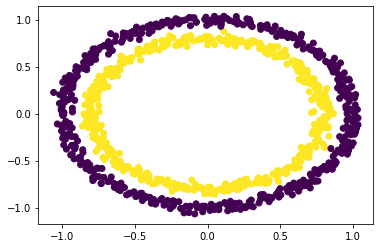

In [5]:
# Visualize the dataset. We can assign colors to various labels using c parameter
plt.scatter(X[:, 0], X[:, 1], c = y);

In [6]:
# So, make_circles created for us a dataset with 2 types of inputs, smaller and bigger circle. 
# Our job is to create a decision boundary and classify where a given point will lie

### Input and Output Shapes

In Classification problems, we need extra precaution while handling input and output tensors and their shapes. This will help us save a lot of debugging time

In [7]:
X.shape, y.shape, X.ndim, y.ndim

((1000, 2), (1000,), 2, 1)

In [8]:
# 1000 input arrays with 2 dims (2-d feature vector) and 1-d output vector

### Data Prep

The data is pretty clean, so we won't do any preprocessing. 
We will split in train-test data.

In [9]:
# Test size
test_size = 0.2

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

In [10]:
# A quick check on dimensions
len(X_train),len(X_test),len(y_train),len(y_test)

# This looks good

(800, 200, 800, 200)

### Modelling

In [11]:
# Experiment 1 - Base Model

# Step 1 - Create the model
tf.random.set_seed(random_state)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(2)) # Let's see if this works
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Step 2 - Compile the model
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Step 3 - Fit the model
history = model.fit(X_train, y_train, epochs = 10, verbose = 0)

# Step 4 - Evaluate the model
train_results = model.evaluate(X_train, y_train)
print("train loss, train acc:", train_results)
test_results = model.evaluate(X_test, y_test)
print("test loss, test acc:", test_results)

25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.4750
train loss, train acc: [0.6911222338676453, 0.4749999940395355]
7/7 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.4700
test loss, test acc: [0.6875343322753906, 0.4699999988079071]


In [12]:
# The basic model gave 47.5% accuracy on training data and 47% on test data

In [13]:
# Experiment 2 - Increase learning rate

# Step 1 - Create the model
tf.random.set_seed(random_state)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(2)) # Let's see if this works
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Step 2 - Compile the model
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

# Step 3 - Fit the model
history = model.fit(X_train, y_train, epochs = 10, verbose = 0)

# Step 4 - Evaluate the model
train_results = model.evaluate(X_train, y_train)
print("train loss, train acc:", train_results)
test_results = model.evaluate(X_test, y_test)
print("test loss, test acc:", test_results)

25/25 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.8725
train loss, train acc: [0.5080161690711975, 0.8725000023841858]
7/7 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.8250
test loss, test acc: [0.535794734954834, 0.824999988079071]


In [14]:
# Boy, that's some jump!!

In [15]:
# Experiment 3 - Increase epochs

# Step 1 - Create the model
tf.random.set_seed(random_state)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(2)) # Let's see if this works
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Step 2 - Compile the model
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

# Step 3 - Fit the model
history = model.fit(X_train, y_train, epochs = 100, verbose = 0)

# Step 4 - Evaluate the model
train_results = model.evaluate(X_train, y_train)
print("train loss, train acc:", train_results)
test_results = model.evaluate(X_test, y_test)
print("test loss, test acc:", test_results)

25/25 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000
train loss, train acc: [0.012343764305114746, 1.0]
7/7 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 1.0000
test loss, test acc: [0.028260713443160057, 1.0]


In [16]:
# Is there anything you want more than this!!!!!

# Next, let's look at some evaluation metrics

In [17]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.9992504 ],
       [0.04722989],
       [0.9991463 ],
       [0.00226009],
       [0.94343805]], dtype=float32)

### Confusion Matrix

In [18]:
# We will create a Confusion Matrix

num_classes = 2

confusion = tf.math.confusion_matrix(labels=y_pred, predictions=y_test, num_classes=num_classes)
print(confusion)

tf.Tensor(
[[100 100]
 [  0   0]], shape=(2, 2), dtype=int32)


Ok, that's a bummer!!!!

In Binary Classification problems, confusion matrix in TF follows this structure - 

                  PREDICTIONS
       ACTUAL       TP  FP
                    FN  TN


So, ideally, you would want all your predictions along the diagonal of the confusion matrix. We are getting equal True Positives and False Positives from the model despite the training accuracy being 100%
Then, what's the issue?

The issue is with the array y_pred. We have predictions which are probabilities, and the label array is 1 or 0. Min value of y_pred is 0.00014472, still > 0
So, whenever the model is comparing versus the array of labels to plot the confusion matrix, whenever we have 1 as the actual value, we get a true positive, since Bool(x : probability(x) > 0) is True, but whenever label is zero, the probability is always > 0 and we get 1 as model predition which is a False positive


So, we need to convert probabilities to labels



In [19]:
min(y_pred)

array([0.00014472], dtype=float32)

In [20]:
# Convert probabilities to labels - we will use simple rounding
y_pred_rounded = np.round(y_pred)

confusion = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_rounded, num_classes=num_classes)
print(confusion)

tf.Tensor(
[[100   0]
 [  0 100]], shape=(2, 2), dtype=int32)


In [21]:
# Would you have a look at that!!!!!

# Next, we can also plot the decision boundary. The following function has been inspired by MadeWithML repo

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f542193c990>)

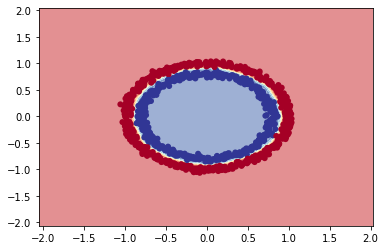

In [22]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(X, y, model, cmap='RdYlBu')

### Classification Report

Following parameters are important to evaluate a classification model. Depending on the problem, one or more of them can be used to evaluate the model and also choose between various models/experiments - 
* True Positives (TP) - True Label is 1, Prediction is 1
* True Negative (TN)  -  True Label is 0, Prediction is 0
* False Positive (FP) - True Label is 0, Prediction is 1
* False Negative (FN) - True Label is 1, Prediction is 0


Next, few terminologies - 

* Accuracy - Correct Predictions / Total Predictions
          (TP + TN) / (TP + TN + FP + FN)

* Precision - Fraction of all true positives out of all predicted positives
          (TP) / (TP + FP)

* Recall - Fraction of all true positives out of all actual positives
          (TP) / (TP + FN)  ---- FN are actually positive

* F1 Score - Harmonic Mean of Precision and Recall
          2 * (P * R) / (P + R)
          where P - Precision, R - Recall


Few pointers - 
1. In most of the cases, Accuracy is a good classfication metric. We want our predictions to be as correct as possible and Accuracy serves that purpose. However, not all the cases, like imbalanced classes
2. Often, there is an inverse relationship between precision and recall, where it is possible to increase one at the cost of reducing the other. So, depending on the problem, we would need to chose which of these is more important. If we want less FP, we need high precision. If we want less FN, we need high recall
3. The F1 score favors classifiers that have similar precision and recall. Thus, the **F1 score is a better measure to use if you are seeking a balance between Precision and Recall.**


Another quick fact. In the problem above, we rounded off the probabilities to convert them to 1,0. In some cases, this might not work and we might need to choose a probability threshold to separate the labels, generally called as Threshold. Now, what is the correct threshold? To chose this, we use ROC Curve (Reciever Operator Characteristic). It is a plot between TPR (y-axis) and FPR (x-axis). For every possible threshold, we calculate TPR and FPR, and chose the model which best serves our purpose, like high precision or high recall.

[Image Source](https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/)

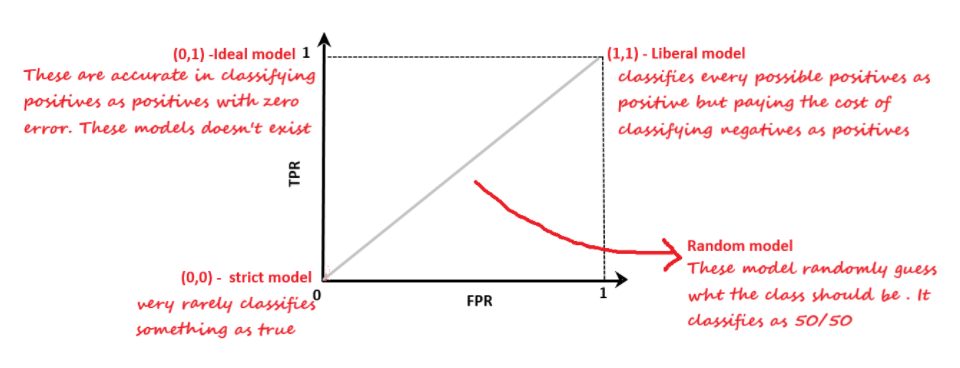

It also helps chose between multiple models, where the model with higher Area under ROC curve seems a better model. More the model is the upper triangle, better it is than a 'random' model. So for different classifiers, we plot their ROC curve for different threshold and then chose the one with higher area under the curve (AUC)


In [23]:
# y_pred_rounded[:5], y[:5]
len(y_test), len(y_pred_rounded)

(200, 200)

In [24]:
# Number of predictions, or test labels, both will be equal
num_predictions = len(y_test) # or len(y_pred_rounded)


# True Positives
# Note : removing len() will give the indices where we get true positives
tp = len([i for i in range(num_predictions) if y_pred_rounded[i] == 1 and y_test[i] == 1])

# True Negatives
tn = len([i for i in range(num_predictions) if y_pred_rounded[i] == 0 and y_test[i] == 0])

# False Positives
fp = len([i for i in range(num_predictions) if y_pred_rounded[i] == 1 and y_test[i] == 0])

# False Negatives
fn = len([i for i in range(num_predictions) if y_pred_rounded[i] == 0 and y_test[i] == 1])

print("Number of True Positives : ", tp)
print("Number of True Negatives : ", tn)
print("Number of False Positives : ", fp)
print("Number of True Negatives : ", fn)

Number of True Positives :  100
Number of True Negatives :  100
Number of False Positives :  0
Number of True Negatives :  0


In [25]:
# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Precision
precision = (tp) / (tp + fp)

# Recall
recall = (tp) / (tp + fn)

# F1
f1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy : ", '{:.2%}'.format(accuracy))
print("Precision : ", '{:.2%}'.format(precision))
print("Recall : ", '{:.2%}'.format(recall))
print("F1 Score : ", f1)

Accuracy :  100.00%
Precision :  100.00%
Recall :  100.00%
F1 Score :  1.0


In [26]:
# That's all for Classification Introduction